<a href="https://colab.research.google.com/github/Tejas9523/DATA_VISUALIZATION/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [12]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [4]:
# Standardize the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=iris.feature_names)
df_scaled['target'] = df['target']

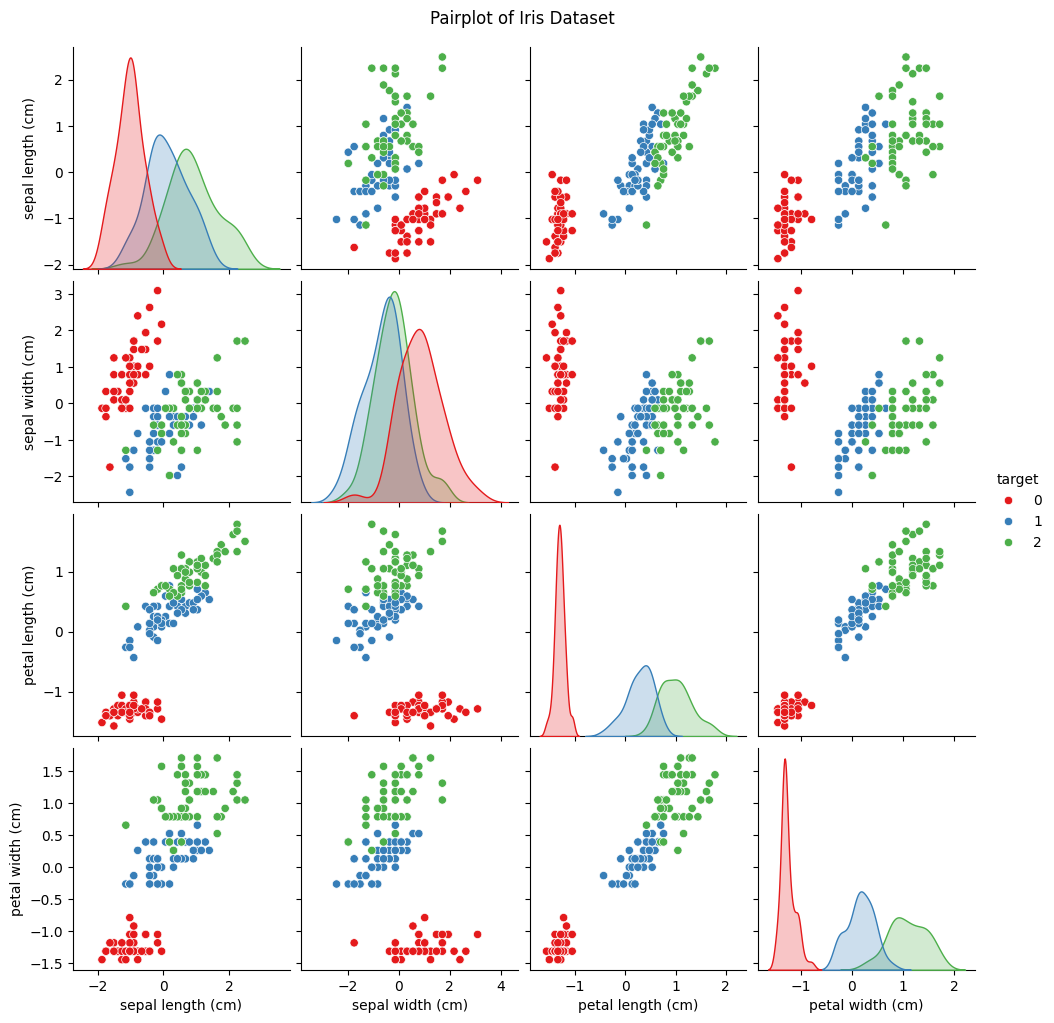

In [5]:
# Plotting Pairplot
sns.pairplot(df_scaled, hue='target', palette='Set1')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

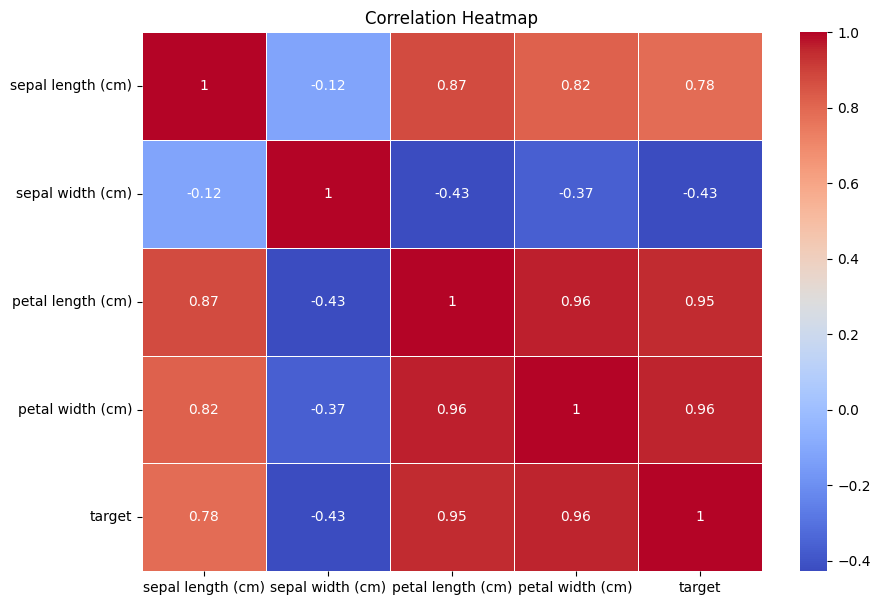

In [6]:
# Plotting Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

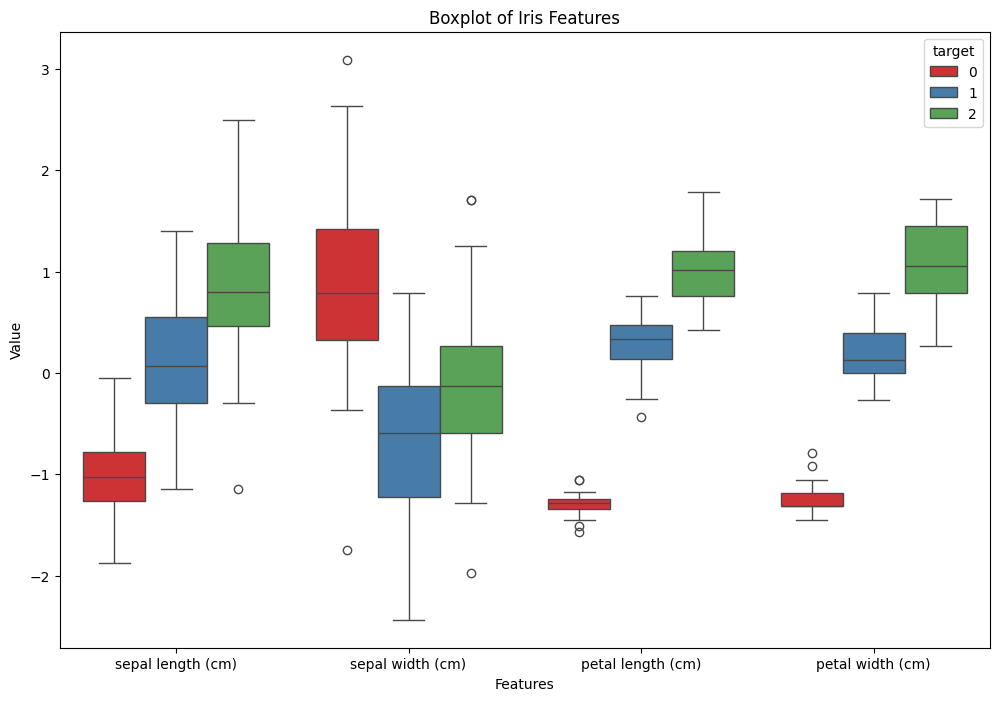

In [7]:
# Plotting Boxplot
plt.figure(figsize=(12, 8))
df_scaled_melted = pd.melt(df_scaled, id_vars='target', var_name='Features', value_name='Value')
sns.boxplot(x='Features', y='Value', hue='target', data=df_scaled_melted, palette='Set1')
plt.title('Boxplot of Iris Features')
plt.show()

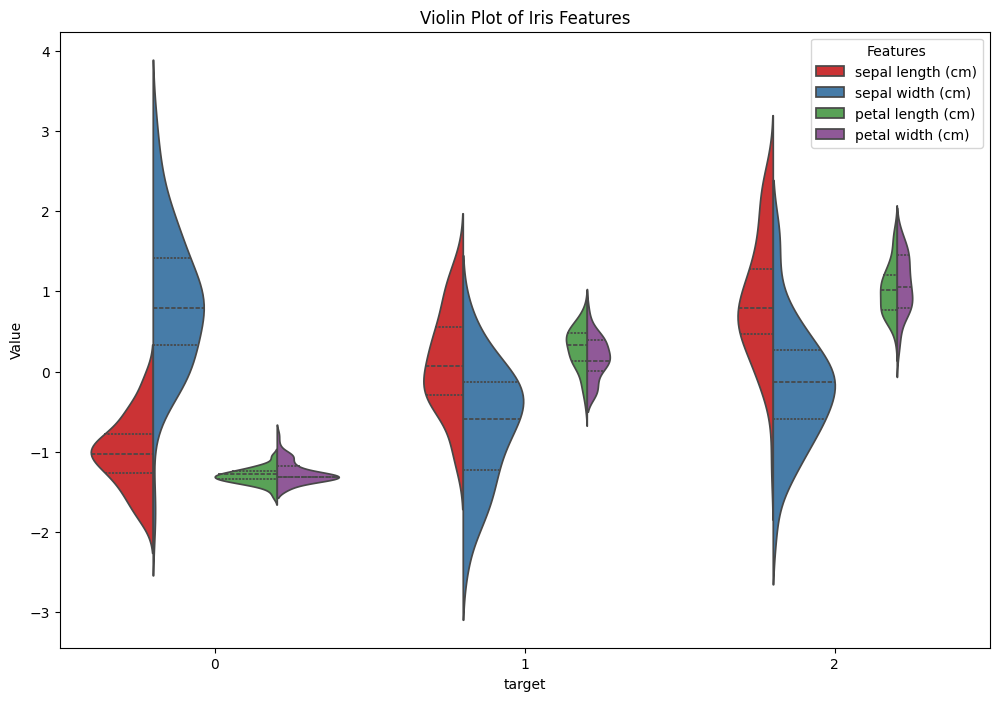

In [8]:

# Plotting Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='target', y='Value', hue='Features', data=df_scaled_melted, split=True, inner='quart', palette='Set1')
plt.title('Violin Plot of Iris Features')
plt.show()

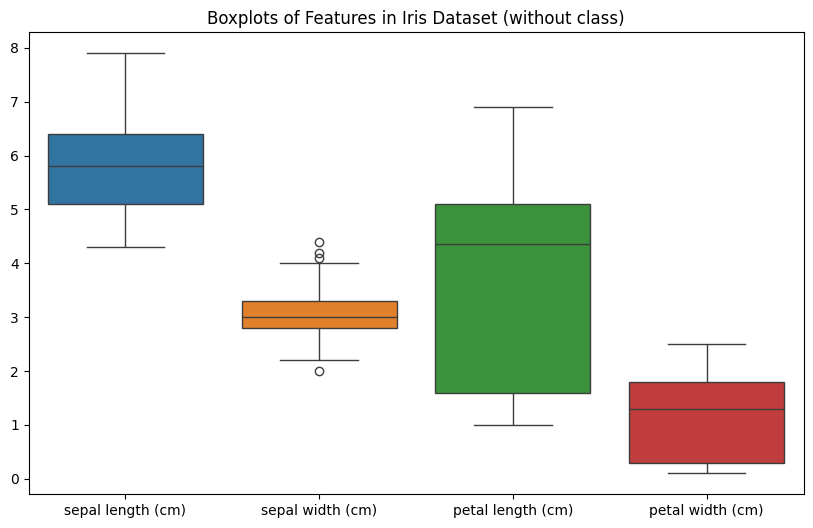

In [13]:
# Identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['target']))
plt.title('Boxplots of Features in Iris Dataset (without class)')
plt.show()

In [15]:
# 4. Identify outliers
outliers = {}
names = df.columns.tolist()
for feature in names[:-1]:
 q1 = df[feature].quantile(0.25)
 q3 = df[feature].quantile(0.75)
 iqr = q3 - q1
 lower_bound = q1 - 1.5 * iqr
 upper_bound = q3 + 1.5 * iqr
 outliers[feature] = df[(df[feature] < lower_bound) |
(df[feature] > upper_bound)]
print("Outliers:")
for feature, data in outliers.items():
 print(f"{feature}: {len(data)} outliers")

Outliers:
sepal length (cm): 0 outliers
sepal width (cm): 4 outliers
petal length (cm): 0 outliers
petal width (cm): 0 outliers
